In [20]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import styling

In [21]:
# Continuous dynamics data
with open('continuous_dyn_example.pkl', 'rb') as f:
    continuous_dyn_report = pickle.load(f)

In [22]:
# Logistic map data
results_path = 'logistic_map/results_training_loop_inspection/'
os.listdir(results_path)
report = {}
for filename in os.listdir(results_path):
    model_name = filename.split('_')[0]
    if model_name not in report:
        report[model_name] = []
    with open(results_path + filename, 'rb') as f:
        restored = pickle.load(f)
    report[model_name].append(restored)

ordered_models = [
    'DPNets',
    'DPNets-relaxed',
    'VAMPNets'
]


DPNets - 0.07717539020449751
DPNets-relaxed - 0.050466887371093914
VAMPNets - 0.14667265058771722


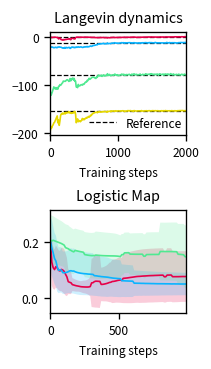

In [23]:
fig, axes = plt.subplots(2, 1, figsize=styling.figsize(0.3, 1/1.8))
# Continuous dynamics
ax = axes[0]
for v_idx, v in enumerate(continuous_dyn_report['reference']):
    if v_idx == 0:
        ax.axhline(v, color='k', linestyle='--', lw=0.75, label='Reference')
    else:
        ax.axhline(v, color='k', linestyle='--', lw=0.75)
ax.plot(continuous_dyn_report['step'], continuous_dyn_report['eigenvalues'])

settings = {
    'xlabel': 'Training steps',
    'title': r'Langevin dynamics',
}
ax.set(**settings)
ax.margins(x=0)
ax.legend(frameon=False, bbox_to_anchor=(1.06, -0.07), loc='lower right')

# Logistic Map
ax = axes[1]

for model_name in ordered_models:
    hausdorff_distance = np.array(report[model_name])
    hdm = hausdorff_distance.mean(axis=0)
    print(f"{model_name} - {hdm[-1]}")
    hds = hausdorff_distance.std(axis=0)
    training_steps = 10*np.arange(len(hdm))
    ax.plot(training_steps, hdm, label=model_name)
    ax.fill_between(
        training_steps,
        hdm - hds,
        hdm + hds,
        alpha=0.2
    )

settings = {
    'xlabel': 'Training steps',
    'title': r'Logistic Map',
}
#ax.legend()
ax.set(**settings)
ax.set_xmargin(0)